In [5]:
# Installing GL package: https://github.com/jwcalder/GraphLearning
#!pip3 install graphlearning
#!pip install annoy torch


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [1]:
import numpy as np
import graphlearning as gl 
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import scipy as sp
import time
from scipy.sparse import diags, csr_matrix

from sklearn.gaussian_process.kernels import Matern

In [2]:
def matern (d, nu=1, sigma=1, rho=1) : 
    return sigma**2 * (2**(1-nu) / sp.special.gamma(nu)) * (np.sqrt(2*nu) * d / rho)**nu * sp.special.kv(nu, np.sqrt(2*nu) * d / rho)

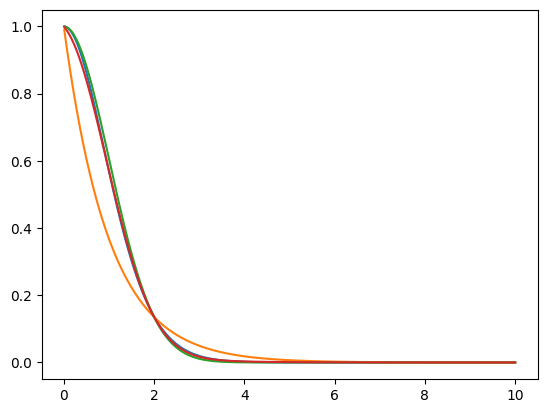

In [3]:
xrange = np.linspace(0, 10, 1000)[1:]
nu = 6
f = np.vectorize(lambda d: matern(d, nu))
plt.plot(xrange, f(xrange))
plt.plot(xrange, np.exp(-xrange))
plt.plot(xrange, np.exp(-xrange**2/2))

plt.plot(xrange, np.exp(-xrange)/(0.5+nu) + np.exp(-xrange**2/2)*(1-1/(0.5+nu)))


### Checkerboard

In [4]:
def matern (d, nu=1, sigma=0.8, rho=1) : 
    return sigma**2 * (2**(1-nu) / sp.special.gamma(nu)) * (np.sqrt(2*nu) * d / rho)**nu * sp.special.kv(nu, np.sqrt(2*nu) * d / rho)

#X,labels = datasets.make_circles(n_samples=500, noise=0.05, factor=0.5)
X, rows, cols = datasets.make_checkerboard((3,3), 3, noise=1)

#train_ind = gl.trainsets.generate(labels, rate=1)
#train_labels = labels[train_ind]

models = []


In [5]:
def matern (d, nu=1, sigma=0.8, rho=1) : 
    return sigma**2 * (2**(1-nu) / sp.special.gamma(nu)) * (np.sqrt(2*nu) * d / rho)**nu * sp.special.kv(nu, np.sqrt(2*nu) * d / rho)

### Two moons


Model: Laplace, KNN gaussian (K=5)
Results File: /Users/lucas/Desktop/AMATH 563/Final project/Code/results/_laplace_accuracy.csv

Number of labels,Accuracy
2,86.14
2,83.94
2,82.33
2,86.95
2,72.49
2,68.67
2,83.73
2,51.61
2,73.49
2,82.53
2,56.63
2,69.48
2,69.88
2,77.91
2,73.90
4,72.18
4,79.23
4,77.62
4,81.05
4,96.37
4,82.26
4,79.44
4,72.38
4,95.77
4,96.17
4,92.94
4,96.17
4,84.27
4,69.76
4,93.75
8,93.90
8,86.99
8,85.37
8,96.34
8,93.50
8,88.62
8,86.38
8,83.74
8,96.34
8,87.40
8,83.74
8,84.55
8,96.34
8,96.75
8,83.33
16,95.66
16,92.77
16,95.87
16,96.28
16,95.87
16,95.66
16,96.28
16,79.13
16,96.28
16,94.42
16,79.96
16,96.49
16,96.49
16,87.81
16,96.07
32,96.37
32,96.58
32,95.94
32,92.95
32,96.37
32,95.73
32,95.94
32,96.37
32,94.44
32,93.59
32,92.52
32,96.15
32,96.37
32,95.30
32,95.94

Model: Poisson, KNN gaussian (K=5)
Results File: /Users/lucas/Desktop/AMATH 563/Final project/Code/results/_poisson_accuracy.csv

Number of labels,Accuracy
2,86.95
2,86.55
2,86.35
2,87.15
2,87.55
2,72.49
2,86.75


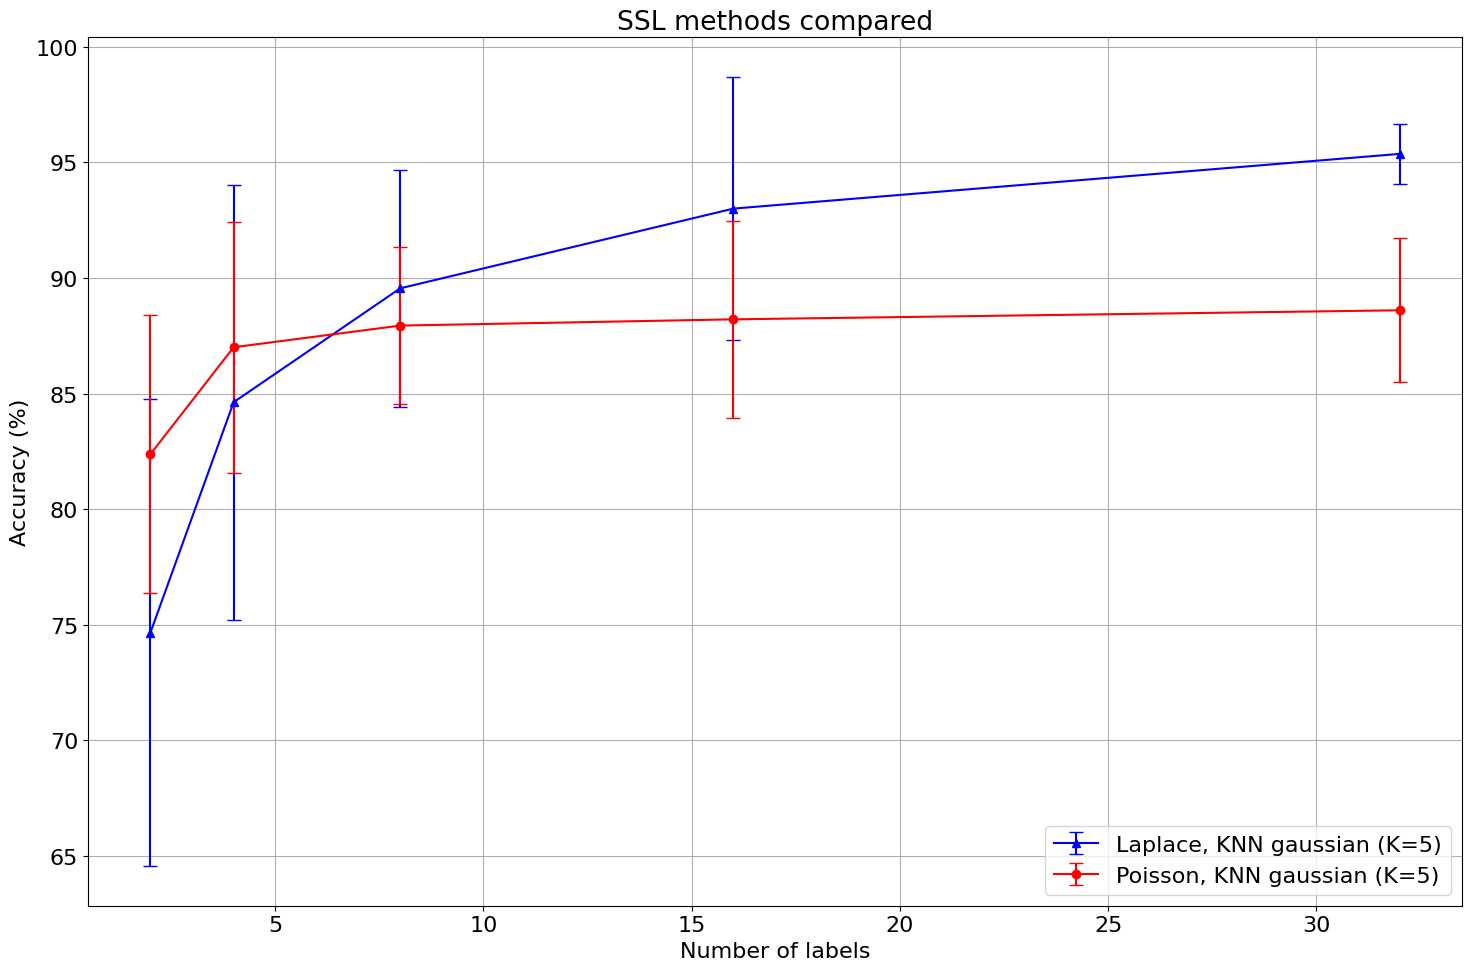

In [11]:
#X,labels = datasets.make_circles(n_samples=500, noise=0.05, factor=0.5)
X, labels = datasets.make_moons(n_samples=500, noise=0.2)

train_inds, train_labels = [], []
for k in range(5) :
    for i in range(15) :
        train_ind = gl.trainsets.generate(labels, rate=2**k)
        train_inds.append(train_ind)
        #train_labels.append(labels[train_ind])

models = []
# KNN
for method in [("Laplace", gl.ssl.laplace), 
               ("Poisson", gl.ssl.poisson), 
               #("Sparse Label Propagation", gl.ssl.sparse_label_propagation),
               #("Random walk", gl.ssl.randomwalk),
               #("Dynamic Label Propagation", gl.ssl.dynamic_label_propagation)] :
               #(r"$p$-Laplace", gl.ssl.plaplace),
               #("Lipschitz", gl.ssl.amle), 
               #("Graph nearest neighbor", gl.ssl.graph_nearest_neighbor)
               ] :
    # KNN
    for K in [5] :
        # Matern kernels
       #for nu in [0.5, 1.5, 2.5] :
       #    eta = lambda d: np.where(d != 0, matern(d, nu), 1)
       #    W = gl.weightmatrix.knn(X, K, eta=eta)
       #    model = method[1](W)
       #    model.name = f"{method[0]} KNN Matern (nu = {nu}, K={K})"
       #    models.append(model)

        #eta = lambda d: np.where(d != 0, matern(d, nu), 1)
        #W = gl.weightmatrix.knn(X, K, eta=eta)
        #model = method[1](W)
        #model.name = f"{method[0]} KNN Exponential (K={K})"
        #models.append(model)
        #    
        ## Standard kernels
        #for kern in ["gaussian", "distance", "uniform"] :
        for kern in ["gaussian"] :
            W = gl.weightmatrix.knn(X, K, kernel=kern)
            model = method[1](W)
            model.name = f"{method[0]}, KNN {kern} (K={K})"
            models.append(model)

for model in models:
    model.ssl_trials(train_inds, labels, overwrite=True)

gl.ssl.accuracy_table(models, title="SSL Comparison: Two Moons")
gl.ssl.accuracy_plot(models, title='SSL methods compared', errorbars=True )

/var/folders/dd/cj9ntbms55s_77bllxts5df80000gn/T/ipykernel_88508/1889856674.py:2: RuntimeWarning: invalid value encountered in multiply
  return sigma**2 * (2**(1-nu) / sp.special.gamma(nu)) * (np.sqrt(2*nu) * d / rho)**nu * sp.special.kv(nu, np.sqrt(2*nu) * d / rho)



Model: Laplace KNN Matern (nu = 0.5, K=5)
Results File: /Users/lucas/Desktop/AMATH 563/Presentation/Code/results/_laplace_accuracy.csv

Number of labels,Accuracy
2,72.49
2,68.47
2,71.89
2,65.86
2,63.45
2,72.49
2,71.69
2,75.70
2,74.30
2,73.49
2,72.69
2,29.52
2,24.90
2,73.29
2,71.89
4,83.27
4,73.19
4,64.72
4,66.73
4,65.32
4,91.73
4,72.38
4,73.59
4,81.25
4,81.65
4,81.05
4,67.14
4,78.43
4,72.58
4,82.66
8,60.77
8,86.18
8,73.58
8,76.63
8,86.79
8,72.76
8,93.50
8,75.20
8,68.70
8,92.07
8,93.09
8,82.52
8,87.20
8,69.72
8,94.51
16,94.01
16,95.25
16,94.42
16,86.78
16,86.36
16,95.04
16,68.39
16,95.45
16,92.98
16,85.12
16,81.82
16,91.53
16,90.08
16,93.39
16,95.87
32,93.80
32,92.31
32,93.80
32,96.15
32,95.30
32,95.73
32,92.95
32,94.66
32,91.24
32,92.95
32,95.94
32,96.37
32,93.16
32,95.51
32,95.09

Model: Laplace KNN Matern (nu = 1.5, K=5)
Results File: /Users/lucas/Desktop/AMATH 563/Presentation/Code/results/_laplace_accuracy.csv

Number of labels,Accuracy
2,72.29
2,68.47
2,71.89
2,65.86
2,63.45
2,72

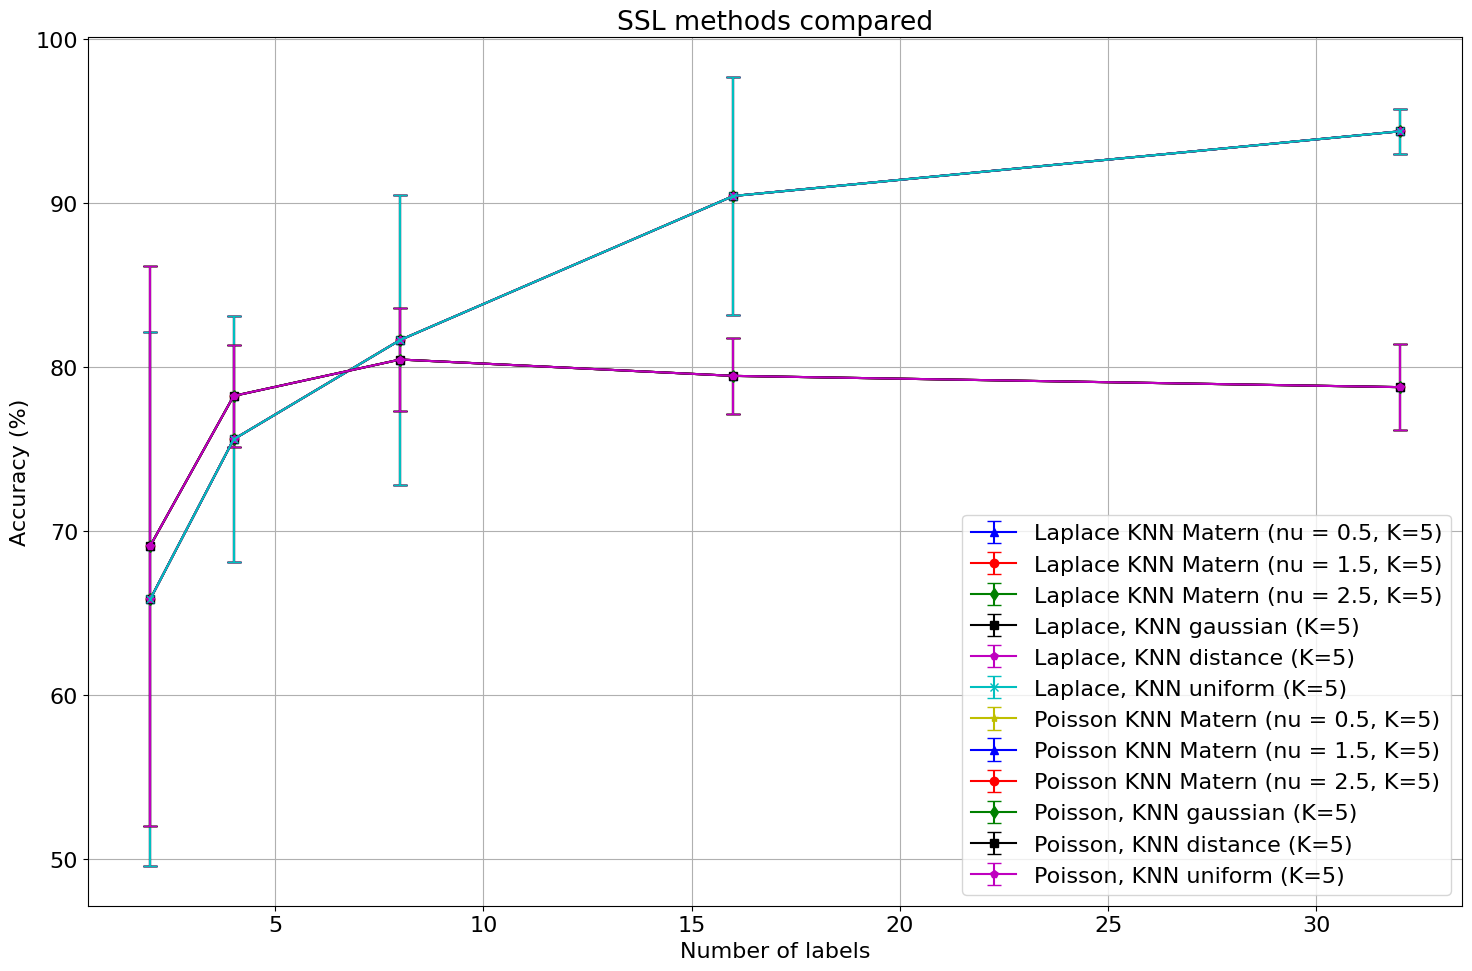

In [12]:
#X,labels = datasets.make_circles(n_samples=500, noise=0.05, factor=0.5)
X, labels = datasets.make_moons(n_samples=500, noise=0.2)

train_inds, train_labels = [], []
for k in range(5) :
    for i in range(15) :
        train_ind = gl.trainsets.generate(labels, rate=2**k)
        train_inds.append(train_ind)
        #train_labels.append(labels[train_ind])

models = []

# KNN
for method in [("Laplace", gl.ssl.laplace), 
               ("Poisson", gl.ssl.poisson)] :
    # KNN
    for K in [5] :
        # Matern kernels
        for nu in [0.5, 1.5, 2.5] :
           eta = lambda d: np.where(d != 0, matern(d, nu), 1)
           W = gl.weightmatrix.knn(X, K, eta=eta)
           model = method[1](W)
           model.name = f"{method[0]} KNN Matern (nu = {nu}, K={K})"
           models.append(model)

        #eta = lambda d: np.where(d != 0, matern(d, nu), 1)
        #W = gl.weightmatrix.knn(X, K, eta=eta)
        #model = method[1](W)
        #model.name = f"{method[0]} KNN Exponential (K={K})"
        #models.append(model)
        #    
        ## Standard kernels
        #for kern in ["gaussian", "distance", "uniform"] :
        for kern in ["gaussian", "distance", "uniform"] :
            W = gl.weightmatrix.knn(X, K, kernel=kern)
            model = method[1](W)
            model.name = f"{method[0]}, KNN {kern} (K={K})"
            models.append(model)

for model in models:
    model.ssl_trials(train_inds, labels, overwrite=True)

gl.ssl.accuracy_table(models, title="SSL Comparison: Two Moons")
gl.ssl.accuracy_plot(models, title='SSL methods compared', errorbars=True )

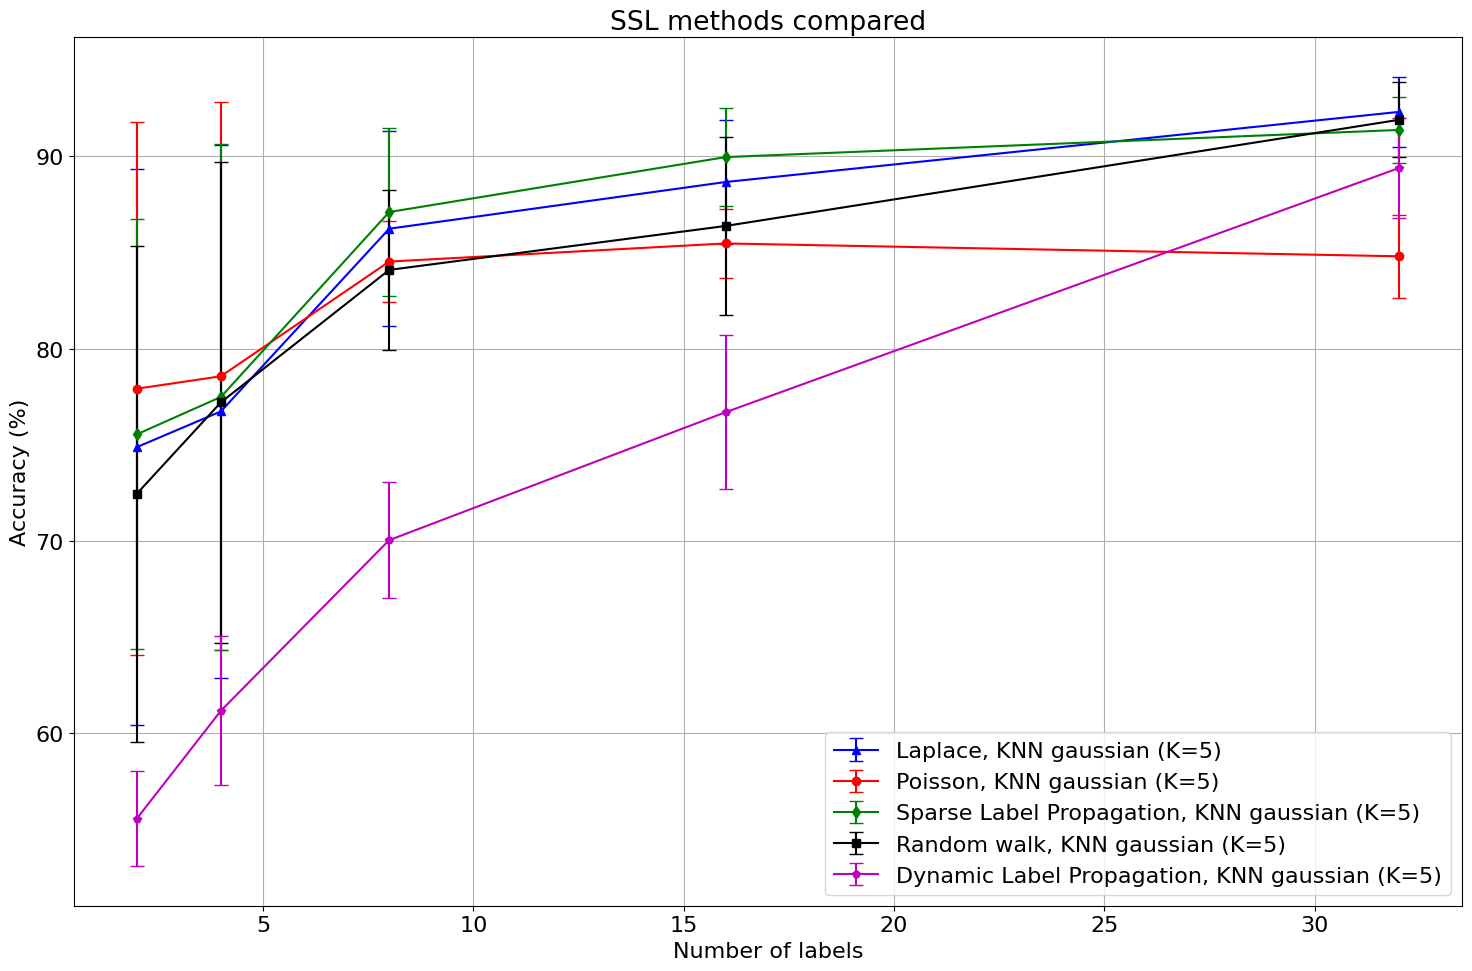

In [11]:
gl.ssl.accuracy_plot(models, title='SSL methods compared', errorbars=True)



In [13]:
X, labels = datasets.make_moons(n_samples=500, noise=0.1)
train_ind = gl.trainsets.generate(labels, rate=1)
train_labels = labels[train_ind]


In [14]:
nu, sigma = 2.5, 1
eta = lambda d: np.where(d != 0, matern(d, nu=nu, sigma=sigma), 1)
K = 5
W = gl.weightmatrix.knn(X, K, eta=eta, symmetrize=True)
#W = gl.weightmatrix.knn(X, K, kernel='gaussian', symmetrize=True)

W_dense = W.toarray()  # Convert to dense format
np.fill_diagonal(W_dense, W_dense.diagonal() - 1)
W = csr_matrix(W_dense)  # Convert back to sparse format

D = np.diagflat(W.sum(axis=1))  # Sum of the rows of W
D_sqrt = np.diagflat(np.sqrt(W.sum(axis=0)))

L = D - W
L_norm = 1 - D_sqrt @ W @ D_sqrt # Normalized
L_RW = 1 - D**(-1) @ W # Random walk
L_PR = 1 - W @ D**(-1) # Page rank

/var/folders/dd/cj9ntbms55s_77bllxts5df80000gn/T/ipykernel_81315/1209245657.py:2: RuntimeWarning: invalid value encountered in multiply
  return sigma**2 * (2**(1-nu) / sp.special.gamma(nu)) * (np.sqrt(2*nu) * d / rho)**nu * sp.special.kv(nu, np.sqrt(2*nu) * d / rho)


/var/folders/dd/cj9ntbms55s_77bllxts5df80000gn/T/ipykernel_81315/1209245657.py:2: RuntimeWarning: invalid value encountered in multiply
  return sigma**2 * (2**(1-nu) / sp.special.gamma(nu)) * (np.sqrt(2*nu) * d / rho)**nu * sp.special.kv(nu, np.sqrt(2*nu) * d / rho)


Laplacian SSL: 69.88%
Laplacian SSL: 69.88%
Laplacian SSL: 69.88%
Laplacian SSL: 69.88%
Laplacian SSL: 69.88%
Laplacian SSL: 69.88%
Laplacian SSL: 69.88%
Laplacian SSL: 69.88%
Laplacian SSL: 69.88%


KeyboardInterrupt: 

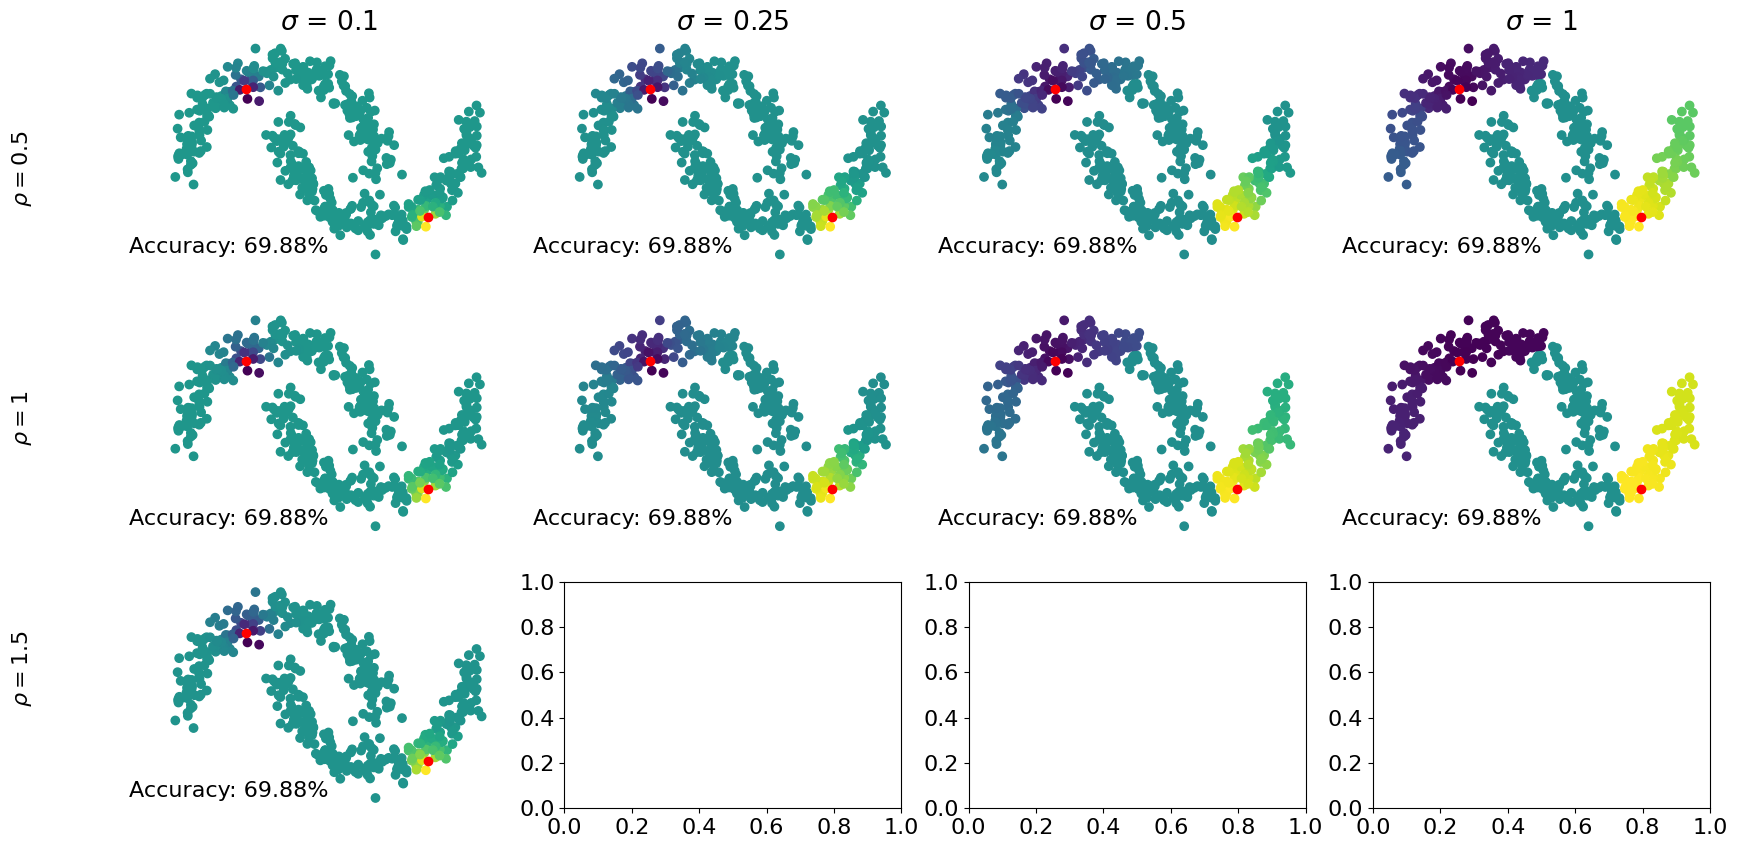

In [15]:
# Laplace SSL
# Define initial conditions : Unlabeled points are 0.5, training points are fixed at labels.

fig, axes = plt.subplots(3, 4, figsize=(20, 10))

rhos = [0.5, 1, 1.5]
sigmas = [0.1, 0.25, 0.5, 1]

# Add row labels
for i, rho in enumerate(rhos):
    fig.text(0.05, 0.75 - i*0.25, fr'$\rho = {rho}$', va='center', rotation='vertical')
    
for i in range(3) :
    for j in range(4) :
        rho = rhos[i]
        sigma = sigmas[j]

        eta = lambda d: np.where(d != 0, matern(d, nu=0.5, sigma=sigma, rho=rho), 1)
        K = 5
        W = gl.weightmatrix.knn(X, K, eta=eta, symmetrize=True)
        #W = gl.weightmatrix.knn(X, K, kernel='gaussian', symmetrize=True)

        W_dense = W.toarray()  # Convert to dense format
        np.fill_diagonal(W_dense, W_dense.diagonal() - 1)
        W = csr_matrix(W_dense)  # Convert back to sparse format

        D = np.diagflat(W.sum(axis=1))  # Sum of the rows of W
        D_sqrt = np.diagflat(np.sqrt(W.sum(axis=0)))

        L = D - W

        v0 = np.zeros(X.shape[0]) + 0.5
        v0[train_ind] = labels[train_ind]
        steps = 0
        while steps < 10**(4) : 
            v0 = np.array(v0 - 0.1*L @ v0).reshape(-1)
            v0[train_ind] = labels[train_ind]
            steps += 1

        c = (v0 > 0.5)*1 - (v0 < 0.5)
        mask = np.ones(X.shape[0], dtype=bool)
        mask[train_ind] = 0

        accuracy = gl.ssl.ssl_accuracy(v0 > 0.5, labels, len(train_ind))  
        print(f"Laplacian SSL: %.2f%%"%accuracy)

        ax = axes[i, j]  # Get the axis for the i-th subplot
        ax.scatter(X[mask, 0], X[mask, 1], c=v0[mask])
        ax.scatter(X[train_ind, 0], X[train_ind, 1], c='r')
        text = f"Accuracy: {accuracy:.2f}%"  # Text to be added
        ax.text(0.5, 0.05, text, transform=ax.transAxes, ha='right')
        # If this is the first row, set the column title
        if i == 0:
            ax.set_title(f'$\sigma$ = {sigma}')

        # If this is the first column, set the row label
        #if j == 0:
        #    ax.set_ylabel(f'$\\nu$ = {nu}')
        #ax.text(0.5, 0.0, fr"sigma = {sigma}, nu = {nu}", transform=ax.transAxes, ha='right')
        ax.axis('off')

plt.show()

/var/folders/dd/cj9ntbms55s_77bllxts5df80000gn/T/ipykernel_88508/1889856674.py:2: RuntimeWarning: invalid value encountered in multiply
  return sigma**2 * (2**(1-nu) / sp.special.gamma(nu)) * (np.sqrt(2*nu) * d / rho)**nu * sp.special.kv(nu, np.sqrt(2*nu) * d / rho)


Laplacian SSL: 84.34%
Laplacian SSL: 84.34%
Laplacian SSL: 84.54%
Laplacian SSL: 85.74%
Laplacian SSL: 84.34%
Laplacian SSL: 84.34%
Laplacian SSL: 84.54%
Laplacian SSL: 86.35%
Laplacian SSL: 84.34%
Laplacian SSL: 84.34%
Laplacian SSL: 84.54%
Laplacian SSL: 86.35%


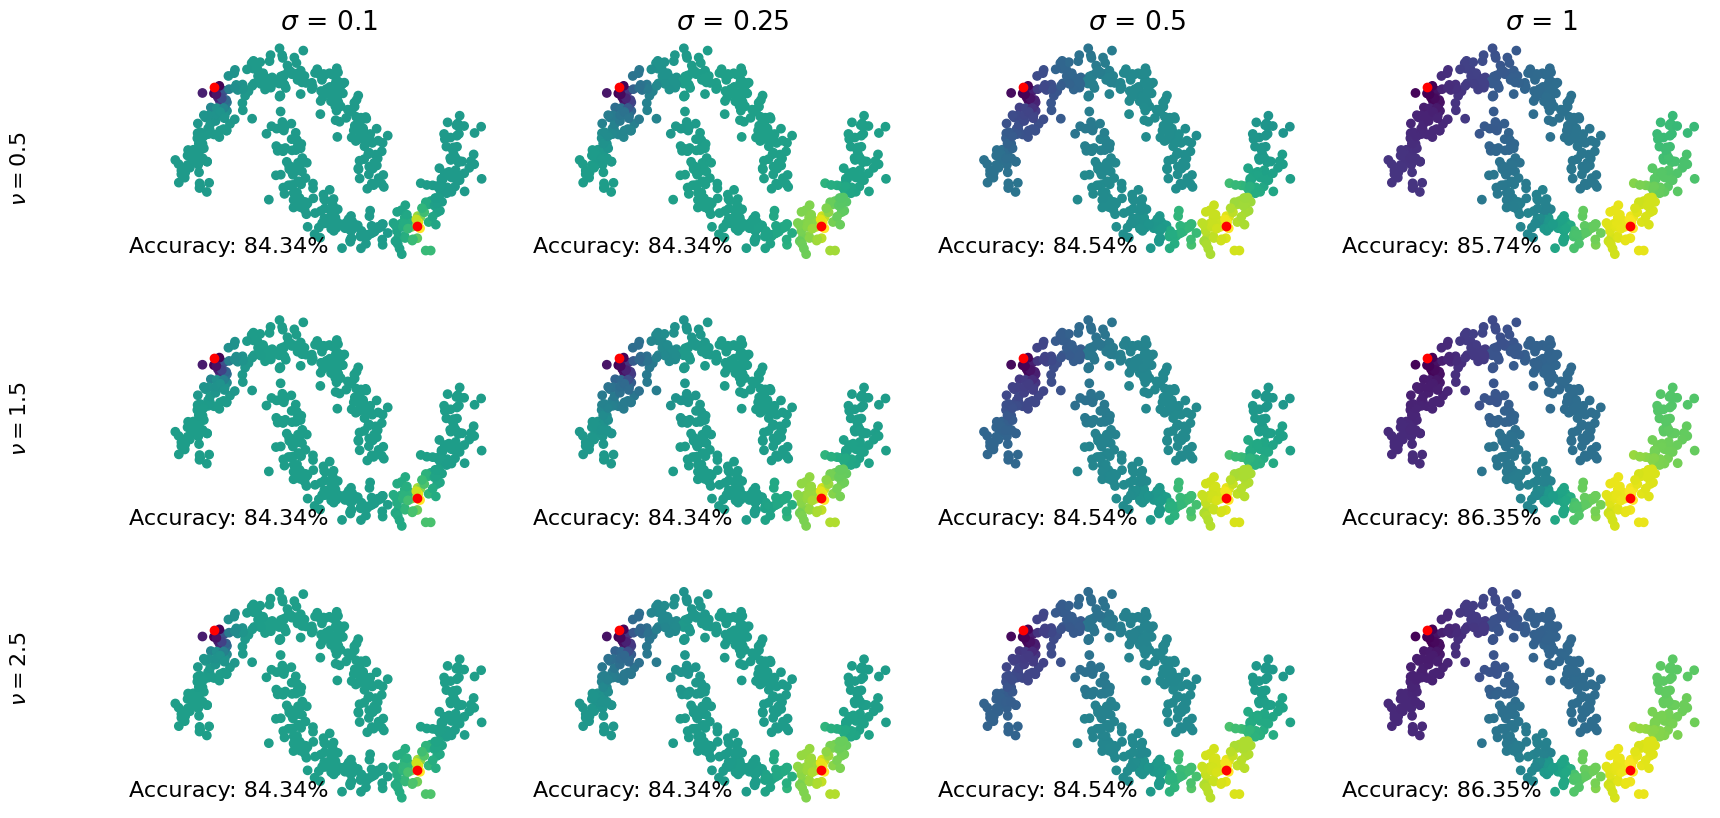

In [50]:
# Laplace SSL
# Define initial conditions : Unlabeled points are 0.5, training points are fixed at labels.

fig, axes = plt.subplots(3, 4, figsize=(20, 10))

nus = [0.5, 1.5, 2.5]
sigmas = [0.1, 0.25, 0.5, 1]

# Add row labels
for i, nu in enumerate(nus):
    fig.text(0.05, 0.75 - i*0.25, fr'$\nu = {nu}$', va='center', rotation='vertical')
    
for i in range(3) :
    for j in range(4) :
        nu = nus[i]
        sigma = sigmas[j]

        eta = lambda d: np.where(d != 0, matern(d, nu=nu, sigma=sigma), 1)
        K = 5
        W = gl.weightmatrix.knn(X, K, eta=eta, symmetrize=True)
        #W = gl.weightmatrix.knn(X, K, kernel='gaussian', symmetrize=True)

        W_dense = W.toarray()  # Convert to dense format
        np.fill_diagonal(W_dense, W_dense.diagonal() - 1)
        W = csr_matrix(W_dense)  # Convert back to sparse format

        D = np.diagflat(W.sum(axis=1))  # Sum of the rows of W
        D_sqrt = np.diagflat(np.sqrt(W.sum(axis=0)))

        L = D - W

        v0 = np.zeros(X.shape[0]) + 0.5
        steps = 0
        while steps < 10**(4) : 
            v0 = np.array(v0 - 0.1*L @ v0).reshape(-1)
            v0[train_ind] += 2*labels[train_ind]-1
            steps += 1

        c = (v0 > 0.5)*1 - (v0 < 0.5)
        mask = np.ones(X.shape[0], dtype=bool)
        mask[train_ind] = 0

        accuracy = gl.ssl.ssl_accuracy(v0 > 0.5, labels, len(train_ind))  
        print(f"Laplacian SSL: %.2f%%"%accuracy)

        ax = axes[i, j]  # Get the axis for the i-th subplot
        ax.scatter(X[mask, 0], X[mask, 1], c=v0[mask])
        ax.scatter(X[train_ind, 0], X[train_ind, 1], c='r')
        text = f"Accuracy: {accuracy:.2f}%"  # Text to be added
        ax.text(0.5, 0.05, text, transform=ax.transAxes, ha='right')
        # If this is the first row, set the column title
        if i == 0:
            ax.set_title(f'$\sigma$ = {sigma}')

        # If this is the first column, set the row label
        #if j == 0:
        #    ax.set_ylabel(f'$\\nu$ = {nu}')
        #ax.text(0.5, 0.0, fr"sigma = {sigma}, nu = {nu}", transform=ax.transAxes, ha='right')
        ax.axis('off')

plt.show()

In [45]:
for j, sigma in enumerate(sigmas):
    fig.text(0.25 + j*0.25, 0.95, fr'$\sigma = {sigma}$', ha='center')

# Add row labels
for i, nu in enumerate(nus):
    fig.text(0.05, 0.75 - i*0.25, fr'$\nu = {nu}$', va='center', rotation='vertical')


/var/folders/dd/cj9ntbms55s_77bllxts5df80000gn/T/ipykernel_88508/3046110846.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


/var/folders/dd/cj9ntbms55s_77bllxts5df80000gn/T/ipykernel_88508/89474557.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Poisson SSL: 50.60%
Poisson SSL: 54.02%
Poisson SSL: 71.29%
Poisson SSL: 84.74%


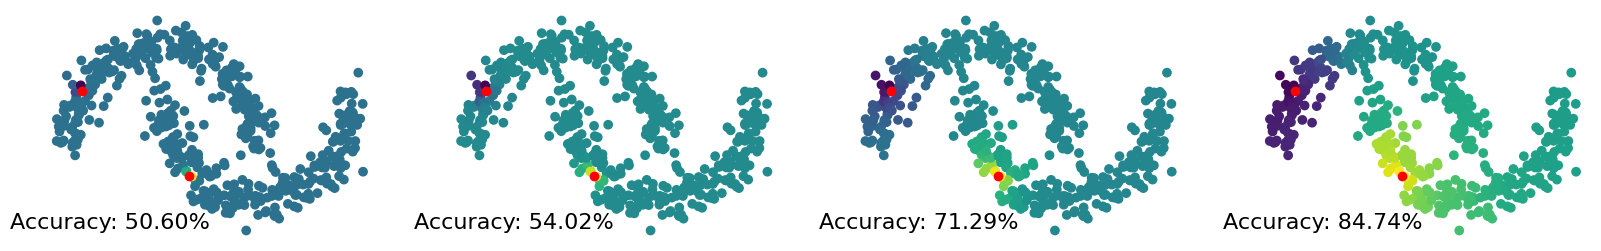

In [336]:
# Poisson SSL
# Define initial conditions : Unlabeled points are 0.5, training points are fixed at labels.
v0 = np.zeros(X.shape[0])

fig, axes = plt.subplots(1, 4, figsize=(20, 3))

for i in range(4) :
    steps = 0
    while steps < 10**(i+1): 
        v0 = np.array(v0 - 0.5 * L @ v0).reshape(-1)
        #v0 = v0/np.abs(v0.mean())
        v0[train_ind] += (2*train_labels - 1)
        steps += 1

    c = 1*(v0 > 0) - 1*(v0 < 0)
    mask = np.ones(X.shape[0], dtype=bool)
    mask[train_ind] = 0

    accuracy = gl.ssl.ssl_accuracy(v0 > 0.5, labels, len(train_ind))  
    print(f"Poisson SSL: %.2f%%"%accuracy)

    ax = axes[i]  # Get the axis for the i-th subplot
    ax.scatter(X[mask, 0], X[mask, 1], c=v0[mask])
    ax.scatter(X[train_ind, 0], X[train_ind, 1], c='r')
    text = f"Accuracy: {accuracy:.2f}%"  # Text to be added
    ax.text(0.5, 0.05, text, transform=ax.transAxes, ha='right')
    ax.axis('off')

In [112]:
S, U = np.linalg.eig(L)

tau = 0.1
C= ['p;U * U.T / (S + tau**2)**2.5

(1, 498)

In [139]:
v0[mask].shape

(498,)

In [130]:
plt.scatter(X[mask,0], X[mask,1], c=v0[mask])
plt.scatter(X[train_ind,0],X[train_ind,1], c='r')
plt.colorbar()
plt.show()

ValueError: Collections can only map rank 1 arrays

<Figure size 640x480 with 2 Axes>

matrix([[ 1.00000000e+00, -2.64250447e-15,  3.87725277e-14, ...,
         -1.64991939e-15,  6.06116719e-13,  1.94957490e-16],
        [-2.64250447e-15,  1.00000000e+00, -1.07438277e-14, ...,
         -1.88732215e-15,  2.05575584e-15,  1.94603419e-13],
        [ 3.87725277e-14, -1.07438277e-14,  1.00000000e+00, ...,
          2.33482025e-15, -6.29962378e-15,  1.11506272e-14],
        ...,
        [-1.64991939e-15, -1.88732215e-15,  2.33482025e-15, ...,
          1.00000000e+00, -1.99629193e-14, -6.55511750e-15],
        [ 6.06116719e-13,  2.05575584e-15, -6.29962378e-15, ...,
         -1.99629193e-14,  1.00000000e+00,  4.80263115e-16],
        [ 1.94957490e-16,  1.94603419e-13,  1.11506272e-14, ...,
         -6.55511750e-15,  4.80263115e-16,  1.00000000e+00]])

In [418]:
## Probit model
probit = lambda p : np.sqrt(2) * sp.special.erfinv(2*p-1) 

minimize = lambda f : X[train_ind]

### Class priors

In [6]:
labels = gl.datasets.load('mnist', labels_only=True)
W = gl.weightmatrix.knn('mnist', 10, metric='vae')

num_train_per_class = 1
train_ind = gl.trainsets.generate(labels, rate=num_train_per_class)
train_labels = labels[train_ind]

class_priors = gl.utils.class_priors(labels)
model = gl.ssl.laplace(W, class_priors=class_priors)
model.fit(train_ind,train_labels)

pred_labels = model.predict(ignore_class_priors=True)
accuracy = gl.ssl.ssl_accuracy(labels,pred_labels,len(train_ind))
print(model.name + ' without class priors: %.2f%%'%accuracy)

pred_labels = model.predict()
accuracy = gl.ssl.ssl_accuracy(labels,pred_labels,len(train_ind))
print(model.name + ' with class priors: %.2f%%'%accuracy)

Laplace Learning without class priors: 11.91%
Laplace Learning with class priors: 96.29%


### MNIST

In [18]:
labels = gl.datasets.load('mnist', labels_only=True)
#W = gl.weightmatrix.knn('mnist', 10, metric='vae', kernel='gaussian')

train_ind = gl.trainsets.generate(labels, rate=2**i)
train_labels = labels[train_ind]

K = 5
models = []
nu = 1.5

for l in [0.1, 0.25, 0.5, 1] :
    eta = lambda d: np.where(d != 0, matern(d, nu=nu, sigma=l), 1)
    W = gl.weightmatrix.knn('mnist', K, metric='vae', eta=eta)
    model = gl.ssl.poisson(W)
    model.name = fr"Matern ($\\sigma = {l}$)"
    models.append(model)

#for kernel in ['gaussian', 'distance', 'uniform'] : 
#    W = gl.weightmatrix.knn('mnist', K, kernel=kernel)
#    model = gl.ssl.poisson(W)
#    model.name = kernel
#    models.append(model)

for model in models:
    pred_labels = model.fit_predict(train_ind,train_labels)
    accuracy = gl.ssl.ssl_accuracy(labels, pred_labels,len(train_ind))
    print(model.name + ': %.2f%%'%accuracy)
    model.ssl_trials(train_inds, labels, overwrite=True)

gl.ssl.accuracy_table(models, title="SSL Comparison: MNIST")
gl.ssl.accuracy_plot(models, title='SSL methods compared', errorbars=True )


/var/folders/dd/cj9ntbms55s_77bllxts5df80000gn/T/ipykernel_88508/1889856674.py:2: RuntimeWarning: invalid value encountered in multiply
  return sigma**2 * (2**(1-nu) / sp.special.gamma(nu)) * (np.sqrt(2*nu) * d / rho)**nu * sp.special.kv(nu, np.sqrt(2*nu) * d / rho)


Matern ($\\sigma = 0.1$): 96.98%

Model: Matern ($\\sigma = 0.1$)
Results File: /Users/lucas/Desktop/AMATH 563/Presentation/Code/results/_poisson_accuracy.csv

Number of labels,Accuracy
2,9.86
2,9.86


/opt/miniconda3/lib/python3.9/site-packages/graphlearning/utils.py:611: RuntimeWarning: invalid value encountered in divide
  alpha = rsold / np.sum(p*Ap,axis=0)


2,9.86
2,9.86
2,9.86
2,9.86
2,9.86
2,9.86
2,9.86
2,9.86
2,9.86
2,9.86
2,9.86
2,9.86
2,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
8,9.85
8,9.85
8,9.85
8,9.85
8,9.85
8,9.85
8,9.85
8,9.85
8,9.85
8,9.85
8,9.85
8,9.85
8,9.85
8,9.85
8,9.85
16,9.84
16,9.84
16,89.02
16,9.84
16,9.84
16,9.84
16,9.84
16,9.84
16,9.84
16,9.84
16,9.84
16,9.84
16,71.92
16,9.84
16,9.84
32,81.03
32,87.64
32,82.32
32,93.81
32,91.27
32,88.15
32,9.82
32,95.33
32,9.82
32,88.35
32,83.43
32,94.22
32,87.10
32,89.23
32,92.74
Matern ($\\sigma = 0.25$): 96.98%

Model: Matern ($\\sigma = 0.25$)
Results File: /Users/lucas/Desktop/AMATH 563/Presentation/Code/results/_poisson_accuracy.csv

Number of labels,Accuracy
2,9.86
2,9.86
2,9.86
2,9.86
2,9.86
2,9.86
2,9.86
2,9.86
2,9.86
2,9.86
2,9.86
2,9.86
2,9.86
2,9.86
2,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
4,9.86
8,9.85
8,9.85
8,9.85
8,9.85
8,9.85
8,9.85
8,9.

ValueError: 
\\sigma = 0.1
^
Unknown symbol: \, found '\'  (at char 0), (line:1, col:1)

Error in callback <function _draw_all_if_interactive at 0x142722e50> (for post_execute):


ValueError: 
\\sigma = 0.1
^
Unknown symbol: \, found '\'  (at char 0), (line:1, col:1)

ValueError: 
\\sigma = 0.1
^
Unknown symbol: \, found '\'  (at char 0), (line:1, col:1)

<Figure size 1500x1000 with 1 Axes>

In [98]:
train_ind

array([28540, 56159, 63265, 19241, 52696, 22928, 63745, 68244, 55286,
        7060, 39673, 53837, 10321, 36868, 33250,  7766, 44388, 21966,
       12667, 50613, 61323, 41990, 27517, 69922,  8457, 59906, 46599,
         463, 11198, 53015, 16726, 48689, 56240, 31577, 17647, 54385,
       28696, 54219, 23946, 16852, 43629, 40758, 37628, 51313, 35619,
       34769, 32047, 44008, 30686,  2434])

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7,
       7, 7, 8, 8, 8, 9, 9, 9], dtype=uint8)

In [190]:
pred_labels.shape

(70000,)

In [183]:
# RKHS approach
labels = gl.datasets.load('mnist', labels_only=True)

num_train_per_class = 1
train_ind = gl.trainsets.generate(labels, rate=num_train_per_class)
train_labels = labels[train_ind]

labels

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import Matern
X, y = load_iris(return_X_y=True)
kernel = 1.0 * Matern(length_scale=1.0, nu=1.5)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0).fit(X, y)

In [186]:
labels.shape

(70000,)

In [187]:
train_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Trials

In [10]:
dataset = 'mnist'
metric = 'vae' 
k = 10 

W = gl.weightmatrix.knn(dataset, k, metric=metric)
D = gl.weightmatrix.knn(dataset, k, metric=metric, kernel='distance')

labels = gl.datasets.load(dataset, metric=metric, labels_only=True)
trainsets = gl.trainsets.load(dataset)

model_list = [gl.ssl.graph_nearest_neighbor(D),
              gl.ssl.laplace(W),
              gl.ssl.laplace(W, reweighting='wnll'), 
              gl.ssl.laplace(W, reweighting='poisson'),
              gl.ssl.poisson(W, solver='gradient_descent')]

tag = dataset + '_' + metric + '_k%d'%k
for model in model_list:
    print('hi')
    model.ssl_trials(trainsets, labels, num_cores=20, tag=tag)

gl.ssl.accuracy_table(model_list, tag=tag, savefile='SSL_'+dataset+'.tex', title="SSL Comparison: "+dataset)
gl.ssl.accuracy_plot(model_list, tag=tag, title='SSL')

hi

Model: Graph NN (alpha=1.00)
Aborting: SSL trial already completed, and overwrite is False.
hi

Model: Laplace Learning
Results File: /Users/lucas/Desktop/AMATH 563/Presentation/Code/results/mnist_vae_k10_laplace_accuracy.csv

Number of labels,Accuracy
30,64.25
30,72.53
40,61.98
20,34.76
10,10.93
50,81.73
20,47.12
10,10.50
40,59.27
20,34.52
10,18.73
50,83.53
30,66.06
40,42.16
10,11.69
50,76.89
20,56.05
30,46.55
40,68.30
30,47.63
20,37.87
50,73.51
10,21.41
40,40.79
50,74.05
30,64.82
20,28.29
10,43.11
50,59.56
40,61.38
10,18.85
20,38.39
30,66.49
10,10.82
50,60.05
40,91.30
40,73.12
20,35.86
30,67.96
50,75.16
20,31.93
40,53.65
30,39.49
10,20.61
10,20.38
20,14.80
50,70.09
30,32.27
40,64.33
20,29.10
30,58.40
50,91.39
10,9.97
40,56.15
50,80.64
10,10.32
20,49.63
30,50.61
40,58.52
10,10.20
50,78.20
20,31.33
30,76.55
40,67.82
10,20.66
50,79.78
20,24.91
30,25.54
40,57.88
50,80.96
10,10.82
20,57.42
30,68.79
10,13.14
20,15.36
40,80.83
50,63.75
30,49.25
40,79.15
50,73.74
10,10.59
20,57.37
30,28.

KeyboardInterrupt: 